# Modeling

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Modeling" data-toc-modified-id="Modeling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Define-constants" data-toc-modified-id="Define-constants-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Define constants</a></span></li><li><span><a href="#Read-in-data" data-toc-modified-id="Read-in-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Read in data</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Model-preparation" data-toc-modified-id="Model-preparation-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Model preparation</a></span></li><li><span><a href="#Train,-test-split" data-toc-modified-id="Train,-test-split-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Train, test split</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Evaluation-metric" data-toc-modified-id="Evaluation-metric-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>Evaluation metric</a></span></li><li><span><a href="#Baseline-model" data-toc-modified-id="Baseline-model-1.7.2"><span class="toc-item-num">1.7.2&nbsp;&nbsp;</span>Baseline model</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-1.7.3"><span class="toc-item-num">1.7.3&nbsp;&nbsp;</span>Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Ridge-Regularzation" data-toc-modified-id="Ridge-Regularzation-1.7.3.1"><span class="toc-item-num">1.7.3.1&nbsp;&nbsp;</span>Ridge Regularzation</a></span></li><li><span><a href="#Lasso-Regularzation" data-toc-modified-id="Lasso-Regularzation-1.7.3.2"><span class="toc-item-num">1.7.3.2&nbsp;&nbsp;</span>Lasso Regularzation</a></span></li><li><span><a href="#Linear-Regression-+-PCA" data-toc-modified-id="Linear-Regression-+-PCA-1.7.3.3"><span class="toc-item-num">1.7.3.3&nbsp;&nbsp;</span>Linear Regression + PCA</a></span></li></ul></li><li><span><a href="#KNN" data-toc-modified-id="KNN-1.7.4"><span class="toc-item-num">1.7.4&nbsp;&nbsp;</span>KNN</a></span></li><li><span><a href="#Tree-Based-Models" data-toc-modified-id="Tree-Based-Models-1.7.5"><span class="toc-item-num">1.7.5&nbsp;&nbsp;</span>Tree Based Models</a></span><ul class="toc-item"><li><span><a href="#Cart" data-toc-modified-id="Cart-1.7.5.1"><span class="toc-item-num">1.7.5.1&nbsp;&nbsp;</span>Cart</a></span></li><li><span><a href="#Bagged-Tree" data-toc-modified-id="Bagged-Tree-1.7.5.2"><span class="toc-item-num">1.7.5.2&nbsp;&nbsp;</span>Bagged Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-1.7.5.3"><span class="toc-item-num">1.7.5.3&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Random-Forest--+-PCA" data-toc-modified-id="Random-Forest--+-PCA-1.7.5.4"><span class="toc-item-num">1.7.5.4&nbsp;&nbsp;</span>Random Forest  + PCA</a></span></li><li><span><a href="#Extra-Trees" data-toc-modified-id="Extra-Trees-1.7.5.5"><span class="toc-item-num">1.7.5.5&nbsp;&nbsp;</span>Extra Trees</a></span></li><li><span><a href="#Ada-Boost" data-toc-modified-id="Ada-Boost-1.7.5.6"><span class="toc-item-num">1.7.5.6&nbsp;&nbsp;</span>Ada Boost</a></span></li></ul></li><li><span><a href="#SVR" data-toc-modified-id="SVR-1.7.6"><span class="toc-item-num">1.7.6&nbsp;&nbsp;</span>SVR</a></span></li><li><span><a href="#Polynomial-Regression" data-toc-modified-id="Polynomial-Regression-1.7.7"><span class="toc-item-num">1.7.7&nbsp;&nbsp;</span>Polynomial Regression</a></span></li><li><span><a href="#Stochastic-Gradient-Descent" data-toc-modified-id="Stochastic-Gradient-Descent-1.7.8"><span class="toc-item-num">1.7.8&nbsp;&nbsp;</span>Stochastic Gradient Descent</a></span></li></ul></li><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Model Selection</a></span></li><li><span><a href="#Model-Elevation" data-toc-modified-id="Model-Elevation-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Model Elevation</a></span></li></ul></li></ul></div>

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR

from sklearn.externals.six import StringIO

from sklearn.metrics import r2_score
import pydotplus

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Define constants

In [2]:
RANDOM_STATE = 20200304

In [3]:
LOCATION = 'ny_state'

## Read in data

In [4]:
df = pd.read_csv(f'../data/final_{LOCATION}_agg.csv')

In [5]:
df.head()

,zipcode,total_accounting,total_airport,total_amusement_park,total_art_gallery,total_atm,total_bakery,total_bank,total_bar,total_beauty_salon,...,mean_price_level,mean_rating,mean_user_ratings_total,population,population_density_square_miles,housing_units,price_level*rating,user_ratings_total_per_capita,rating_weighed_population_density,log_home_price_to_income_ratios
0,11201,0,0,0,0,0,2,0,8,0,...,2.018519,4.147945,632.904110,62823,44643.3,30741,8.372704,0.010074,185177.962192,1.991625
1,14215,0,0,0,0,1,1,0,1,0,...,1.272727,3.813158,197.263158,39962,8107.1,18477,4.853110,0.004936,30913.652368,0.537717
2,10927,0,0,0,0,1,1,0,2,0,...,1.384615,4.097826,84.086957,12081,6144.4,3816,5.673913,0.006960,25178.682609,1.397868
3,14131,0,0,0,0,0,2,0,1,0,...,1.428571,3.255000,58.400000,5039,119.3,2211,4.650000,0.011590,388.321500,0.729344
4,12155,0,0,0,0,0,0,0,1,0,...,1.250000,4.177778,317.333333,1809,31.8,1123,5.222222,0.175419,132.853333,0.850373


In [6]:
df.shape

(1521, 105)

## Preprocessing

In [7]:
def high_corr_w_dependent_variable(df, dependent_variable, corr_value):
    '''
    Takes df, dependent variable, and value of correlation 
    Returns a df of independant varibles that are highly (e.g. abs(corr) > 0.4) with dependent varible
    '''
    temp_df = df.corr()[[dependent_variable]].sort_values(by=dependent_variable, ascending=False)
    mask_1 = abs(temp_df[dependent_variable]) > corr_value
    return temp_df.loc[mask_1]

In [8]:
high_corr_w_dependent_variable(df, 'log_home_price_to_income_ratios', 0.06)

,log_home_price_to_income_ratios
log_home_price_to_income_ratios,1.000000
total_open_now_True,0.613297
population_density_square_miles,0.588593
rating_weighed_population_density,0.585944
population,0.568489
housing_units,0.564353
total_meal_delivery,0.492924
total_store,0.490759
total_food,0.489080
total_cafe,0.487195


In [9]:
df = df[high_corr_w_dependent_variable(df, 'log_home_price_to_income_ratios', 0.06).index]

In [10]:
df.dropna(inplace=True)

In [11]:
df.drop(columns='zipcode', inplace=True)

## Model preparation

In [12]:
target = 'log_home_price_to_income_ratios'
X = df.drop(columns=target)
y = df[target]

## Train, test split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE, train_size=0.60)

## Modeling

###  Evaluation metric

I will use R2 as the model evaluation metric.

Define a funciton to display train, test, cross val R2 scores

In [14]:
# Define a funciton to display train, test, cross val R2 scores
def print_results(model, grid_search=True, X=X, y=y, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    if not grid_search:
        print(f'train score: {model.score(X_train, y_train)}')
        print(f'test score: {model.score(X_test, y_test)}')
        print(f'cross val score: {cross_val_score(model, X, y, scoring="r2", cv=4).mean()}')
    else: 
        print(f'best params: {model.best_params_}')
        print(f'train score: {model.score(X_train, y_train)}')
        print(f'test score: {model.score(X_test, y_test)}')
        print(f'cross val score: {cross_val_score(model.best_estimator_, X, y, scoring="r2", cv=4).mean()}')      

Define a function to plot feature importance for tree based models

In [15]:
def plot_feature_importance(model, X=X):
    # Get feature importance, and create a pd dataframe
    feature_importance = pd.DataFrame(dict(zip(X.columns, 
                                               gs_tree.best_estimator_['tree'].feature_importances_)).items())
    # Sorted by feature importance
    feature_importance = feature_importance.sort_values(by=[1])
    
    # Create plot
    plt.figure(figsize=(10, 15))
    ax = plt.barh(y = feature_importance[0], width=feature_importance[1])
    return ax 

### Baseline model

In [16]:
# Create a dummy regressor that will just predict means
dummy_mean = DummyRegressor(strategy='mean').fit(X_train, y_train)

In [17]:
print_results(dummy_mean, grid_search=False)

train score: 0.0
test score: -0.0005447587969313883
cross val score: -0.003156233335809111


### Linear Regression

In [18]:
lr = LinearRegression().fit(X_train, y_train)

In [19]:
print_results(lr, grid_search=False)

train score: 0.6272425857947569
test score: 0.6299639882401351
cross val score: 0.6094240146129921


The model performs okay comparing to the baseline model, and shows no apparent signs of overfitting.  

**NOTE**: If the model shows any signs of overfitting, I will go through the following subsections using regularization for dimensionality reduction: Ridge, Lasso, and PCA.

#### Ridge Regularzation 

In [20]:
# pipe = Pipeline(steps=[
#     ('sc', StandardScaler()),
#     ('ridge', Ridge())
# ])

# params = {
#    'ridge__alpha' : [0.01, 1, 10, 100, 200, 400],
# }

# gs_ridge = GridSearchCV(
#     pipe,
#     params,
#     cv=4
# ).fit(X_train, y_train);

In [21]:
# print_results(gs_ridge)

#### Lasso Regularzation

In [22]:
# pipe = Pipeline(steps=[
#     ('sc', StandardScaler()),
#     ('lasso', Lasso())
# ])

# params = {
#    'lasso__alpha' : [0.01, 0.02, 1, 2, 3, 10],
# }

# gs_lasso = GridSearchCV(
#     pipe,
#     params,
#     cv=4
# ).fit(X_train, y_train);

In [23]:
# print_results(gs_lasso)

#### Linear Regression + PCA

In [24]:
# # Use a pipeline to combine StandardScaler and KNN
# pipe = Pipeline(steps=[
#     ('ss', StandardScaler()),
#     ('pca', PCA()),
#     ('lr_pca', LinearRegression())
# ])

# params = {
#     'pca__n_components': [10, 15, 20],
# }

# lr_pca = GridSearchCV(
#     pipe,
#     params,
#     cv=4
# ).fit(X_train, y_train);

In [25]:
# print_results(lr_pca)

### KNN

In [26]:
pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

pipe_params = {
    'knn__n_neighbors': [5, 10, 50],
    'knn__p' : [1, 2],
    'knn__weights' : ['uniform', 'distance'],
     #'knn__leaf_size' : [30, 40]
}

gs_knn = GridSearchCV(
    pipe,
    pipe_params,
    cv=4
).fit(X_train, y_train);

In [27]:
print_results(gs_knn)

best params: {'knn__n_neighbors': 10, 'knn__p': 1, 'knn__weights': 'distance'}
train score: 1.0
test score: 0.581451308862299
cross val score: 0.5519508763276724


### Tree Based Models

#### Cart

In [28]:
pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('tree', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

params = {
    'tree__max_depth' : [10, 15, 20, 30],
    'tree__min_samples_leaf' : [2, 3, 5],
    'tree__max_features' : [4, 6, 10]
}

gs_tree = GridSearchCV(
    pipe,
    params,
    cv=4
).fit(X_train, y_train);

In [29]:
print_results(gs_tree)

best params: {'tree__max_depth': 20, 'tree__max_features': 10, 'tree__min_samples_leaf': 3}
train score: 0.8832102707262965
test score: 0.522152290299416
cross val score: 0.42556536428228464


The tree model is very overfit and has high variance, since the train score is much higher than the test score, which is common in CART models. I will use a bootstrapped tree to reduce the variance.

#### Bagged Tree

In [30]:
pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('bag', BaggingRegressor(random_state=RANDOM_STATE))
])

params = {
    'bag__n_estimators' : [8, 10, 12, 14],
    'bag__max_samples' : [0.5, 0.7, 1],
    'bag__max_features' : [0.5, 0.7, 1]
}

gs_bag = GridSearchCV(
    pipe,
    params,
    cv=4
).fit(X_train, y_train);

In [31]:
print_results(gs_bag)

best params: {'bag__max_features': 0.5, 'bag__max_samples': 0.7, 'bag__n_estimators': 14}
train score: 0.8919844002623166
test score: 0.6672318331870202
cross val score: 0.6315054564921184


The bagged tree still shows signs of overfitting. I will move on to a random forest model to control the overfitting.

#### Random Forest

In [33]:
pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('forest', RandomForestRegressor(random_state=RANDOM_STATE))
])

params = {
    'forest__max_depth' : [10, 15, 20, 30],
    'forest__min_samples_leaf' : [2, 3, 5],
    'forest__max_features' : [4, 6, 10],
    'forest__min_impurity_decrease' : [0.0, 0.1]
}

gs_forest = GridSearchCV(
    pipe,
    params,
    cv=4
).fit(X_train, y_train);

In [34]:
print_results(gs_forest)

best params: {'forest__max_depth': 15, 'forest__max_features': 10, 'forest__min_impurity_decrease': 0.0, 'forest__min_samples_leaf': 2}
train score: 0.88848724282131
test score: 0.6593871406269363
cross val score: 0.653930276406735


####  Random Forest  + PCA

In [35]:
# Use a pipeline to combine StandardScaler and KNN
pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('pca', PCA()),
    ('forest_pca', RandomForestRegressor(random_state=RANDOM_STATE))
])

params = {
    'pca__n_components': [10, 15, 20],
    'forest_pca__max_depth' : [10, 15, 20, 30],
    'forest_pca__min_samples_leaf' : [2, 3, 5],
    'forest_pca__max_features' : [5, 7, 10],
    'forest_pca__min_impurity_decrease' : [0.0, 0.1]
}

gs_forest_pca = GridSearchCV(
    pipe,
    params,
    cv=4
).fit(X_train, y_train);

In [36]:
print_results(gs_forest_pca)

best params: {'forest_pca__max_depth': 30, 'forest_pca__max_features': 5, 'forest_pca__min_impurity_decrease': 0.0, 'forest_pca__min_samples_leaf': 3, 'pca__n_components': 10}
train score: 0.8067227577429934
test score: 0.6023732337937301
cross val score: 0.5509417344528398


#### Extra Trees 

In [37]:
# Use a pipeline to combine StandardScaler and KNN
pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('extra', ExtraTreesRegressor(random_state=RANDOM_STATE))
])

params = {
    'extra__max_depth' : [10, 15, 20, 30],
    'extra__min_samples_leaf' : [2, 3, 5],
    'extra__max_features' : [4, 6, 10],
    'extra__min_impurity_decrease' : [0.0, 0.1]
}

gs_extra = GridSearchCV(
    pipe,
    params,
    cv=4
).fit(X_train, y_train);

In [38]:
print_results(gs_extra)

best params: {'extra__max_depth': 30, 'extra__max_features': 10, 'extra__min_impurity_decrease': 0.0, 'extra__min_samples_leaf': 2}
train score: 0.9284390836238476
test score: 0.6462377658133119
cross val score: 0.6213162975677895


#### Ada Boost

In [39]:
# Use a pipeline to combine StandardScaler and KNN
pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('ada', AdaBoostRegressor(random_state=RANDOM_STATE))
])

params = {
    'ada__learning_rate' : [0.5, 1.0, 1.2],
    'ada__loss' : ['linear', 'square', 'exponential']
}

gs_ada = GridSearchCV(
    pipe,
    params,
    cv=4
).fit(X_train, y_train);

In [40]:
print_results(gs_ada)

best params: {'ada__learning_rate': 1.2, 'ada__loss': 'exponential'}
train score: 0.683924316123474
test score: 0.5810737152728165
cross val score: 0.5702154766232443


### SVR

In [41]:
pipe = Pipeline(steps=[
    ('sc', StandardScaler()),
    ('svr', SVR())
])

params = {
    'svr__gamma' : ['scale'],
    'svr__degree' : [2, 3, 4],
    'svr__kernel' : ['linear', 'poly', 'rbf']
}

gs_svr = GridSearchCV(
    pipe,
    params,
    cv=5
).fit(X_train, y_train);

In [42]:
print_results(gs_svr)

best params: {'svr__degree': 2, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}
train score: 0.8055148225193891
test score: 0.6246707825638675
cross val score: 0.6141956230616833


### Polynomial Regression

In [43]:
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('poly_features', PolynomialFeatures()),
    ('lr', LinearRegression())
])

params = {
    'poly_features__degree': [1, 2, 3],
}

gs_poly = GridSearchCV(
    pipe,
    params,
    cv=5
).fit(X_train, y_train);

In [44]:
print_results(gs_poly)

best params: {'poly_features__degree': 1}
train score: 0.6272425857947569
test score: 0.6299639882401329
cross val score: 0.6094240146129926


### Stochastic Gradient Descent

In [45]:
pipe = Pipeline(steps=[
    ('sc', StandardScaler()),
    ('SGD', SGDRegressor())
])

params = {
    'SGD__max_iter': [800, 1000, 1200],
    'SGD__penalty' : ['l1', 'l2'],
    'SGD__tol': [1e-3]
}

gs_sgd = GridSearchCV(
    pipe,
    params,
    cv=5
    
).fit(X_train, y_train);

In [46]:
print_results(gs_sgd)

best params: {'SGD__max_iter': 1000, 'SGD__penalty': 'l1', 'SGD__tol': 0.001}
train score: 0.6203541209939945
test score: 0.6229847266089468
cross val score: 0.6040960366409713


## Model Selection

In [47]:
def view_all_test_score(model_list, grid_search=True, X_test=X_test, y_test=y_test):
    if grid_search:
        for model in model_list:
            print(f'{model.estimator.steps[-1][0]} test score: {model.score(X_test, y_test)}')
    else: 
         for model in model_list:
            print(f'{type(model).__name__} test score: {model.score(X_test, y_test)}')

In [48]:
non_grid_search_model_list = [dummy_mean, lr]

In [49]:
grid_search_model_list = [#lr_pca, gs_ridge, gs_lasso,
                          gs_knn, 
                          gs_tree, gs_bag, gs_forest, 
                          gs_forest_pca, gs_extra, gs_ada,
                          gs_svr, gs_poly, gs_sgd]

In [50]:
view_all_test_score(non_grid_search_model_list,  grid_search=False)

DummyRegressor test score: -0.0005447587969313883
LinearRegression test score: 0.6299639882401351


In [51]:
view_all_test_score(grid_search_model_list)

knn test score: 0.581451308862299
tree test score: 0.522152290299416
bag test score: 0.6672318331870202
forest test score: 0.6593871406269363
forest_pca test score: 0.6023732337937301
extra test score: 0.6462377658133119
ada test score: 0.5810737152728165
svr test score: 0.6246707825638675
lr test score: 0.6299639882401329
SGD test score: 0.6229847266089468


The best performing model is the bagged tree model

## Model Elevation

<BarContainer object of 48 artists>

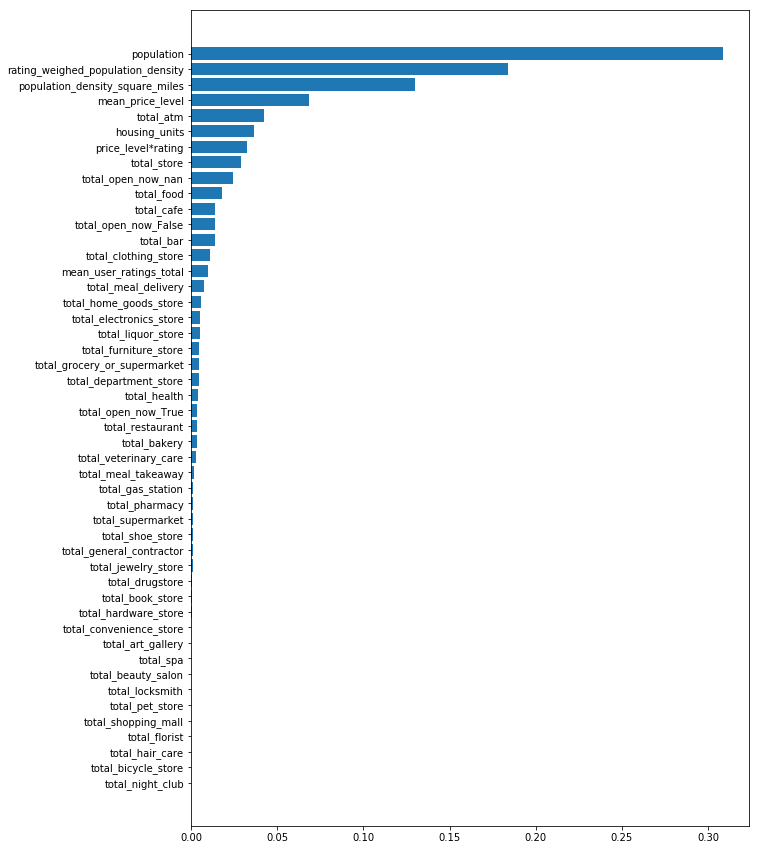

In [53]:
plot_feature_importance(gs_bag)